In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib

In [2]:
# Path to your dataset directory
image_dir = 'C:\\Users\\phani\\Desktop\\tea_sickness_dataset'
dataset_dir = pathlib.Path(image_dir)  # Replace with your dataset directory path

In [3]:
# list of sub directory(class)
class_names = []
for x in os.walk(image_dir):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('\\')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['tea_sickness_dataset', 'algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [4]:
# print total number of images in the dataset
for class_i in class_names:
    image_count = len(list(dataset_dir.glob(f'{class_i}/*.jpg')))
    print(f"Images in class {class_i}:",image_count)

Images in class tea_sickness_dataset: 0
Images in class algal leaf: 113
Images in class Anthracnose: 100
Images in class bird eye spot: 100
Images in class brown blight: 113
Images in class gray light: 100
Images in class healthy: 74
Images in class red leaf spot: 143
Images in class white spot: 142


In [5]:
# Parameter setting
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [6]:
# Load data for Training
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [7]:
# Load data for Validation
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,                                                            
                                                     validation_split=val_split,                                                            
                                                     subset="validation",                                                     
                                                     seed=123,                                                     
                                                     image_size=(img_height, img_width),                                                     
                                                     batch_size=val_batch                                                           
                                                    )

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [9]:
# Function to load images and their labels
def load_images(image_dir):
    images = []
    labels = []
    label_names = os.listdir(image_dir)
    for label in label_names:
        disease_path = os.path.join(image_dir, label)
        if os.path.isdir(disease_path):
            for image_file in os.listdir(disease_path):
                image_path = os.path.join(disease_path, image_file)
                if os.path.isfile(image_path):
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (128, 128))  # Resize images to 128x128
                    images.append(image)
                    labels.append(label_names.index(label))
    return np.array(images), np.array(labels), label_names

In [10]:
# Load images and labels
images, labels, label_names = load_images(image_dir)


In [11]:
# Normalize the images
images = images / 255.0

In [12]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(label_names))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


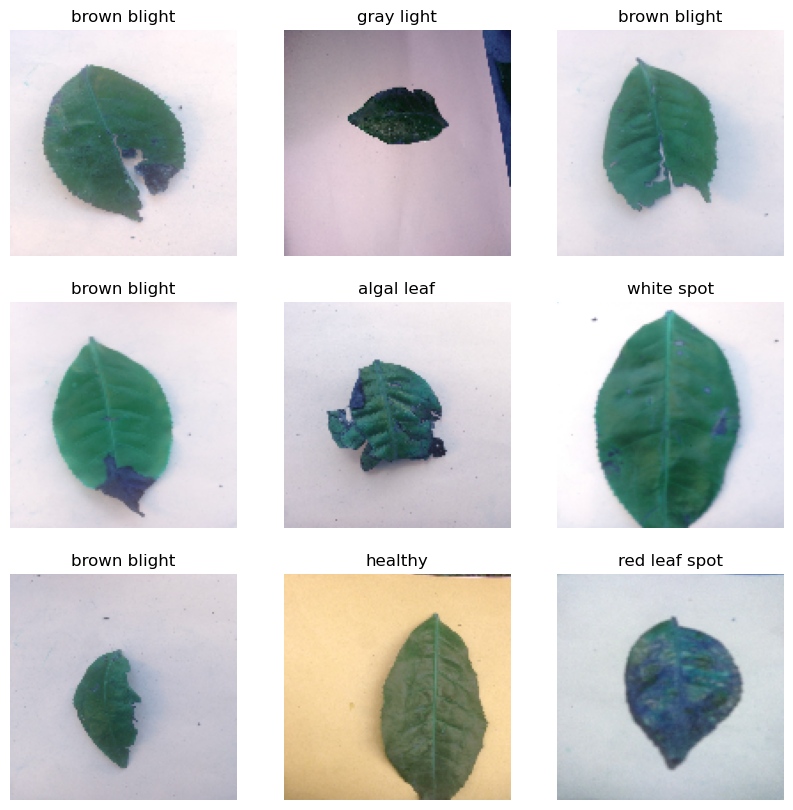

In [13]:
# Display some images and their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(label_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [14]:
# Create and Train the CNN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
# Function to create and compile the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(label_names), activation='softmax')  # Number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
# Create the model
model = create_model()

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [23]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 21s 931ms/step - loss: 0.5829 - accuracy: 0.7514 - val_loss: 0.5808 - val_accuracy: 0.7627
Epoch 2/20
23/23 [==============================] - 21s 935ms/step - loss: 0.6627 - accuracy: 0.7288 - val_loss: 0.5771 - val_accuracy: 0.7797
Epoch 3/20
23/23 [==============================] - 21s 899ms/step - loss: 0.5380 - accuracy: 0.7797 - val_loss: 0.4795 - val_accuracy: 0.8418
Epoch 4/20
23/23 [==============================] - 21s 927ms/step - loss: 0.5543 - accuracy: 0.7712 - val_loss: 0.4180 - val_accuracy: 0.8644
Epoch 5/20
23/23 [==============================] - 22s 934ms/step - loss: 0.4900 - accuracy: 0.7881 - val_loss: 0.6145 - val_accuracy: 0.7797
Epoch 6/20
23/23 [==============================] - 22s 962ms/step - loss: 0.5308 - accuracy: 0.7881 - val_loss: 0.6328 - val_accuracy: 0.7740
Epoch 7/20
23/23 [==============================] - 23s 981ms/step - loss: 0.5900 - accuracy: 0.7458 - val_loss: 0.6200 - val_accuracy: 0.7797

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



6/6 [==============================] - 1s 196ms/step - loss: 0.4355 - accuracy: 0.8475
Test Accuracy: 84.75%


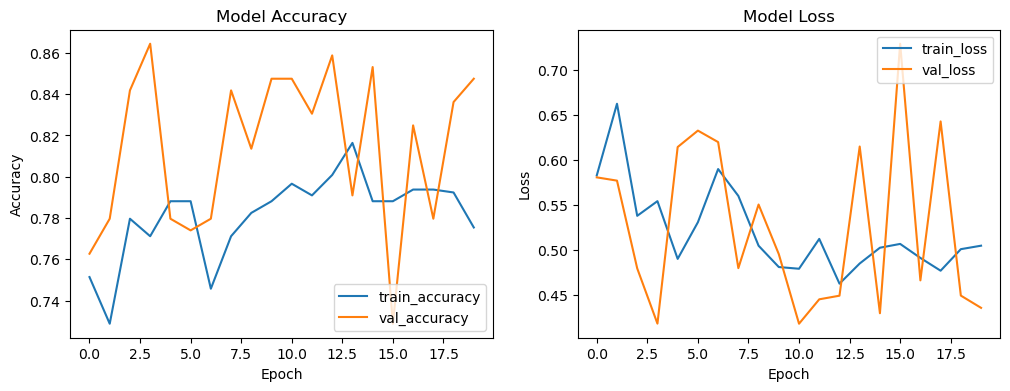

In [25]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [26]:
# Save the model
model.save('tea_leaf_disease_model.h5')


In [27]:
# Load the model
loaded_model = tf.keras.models.load_model('tea_leaf_disease_model.h5')



In [28]:

# Function to make a prediction
def predict_image(image, model):
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    return prediction



In [29]:
# Make predictions on test images
predictions = []
for i in range(len(X_test)):
    prediction = predict_image(X_test[i], loaded_model)
    predictions.append(prediction)

# Convert predictions to class labels
predicted_labels = [label_names[np.argmax(pred)] for pred in predictions]
true_labels = [label_names[np.argmax(true)] for true in y_test]

1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 80ms/step


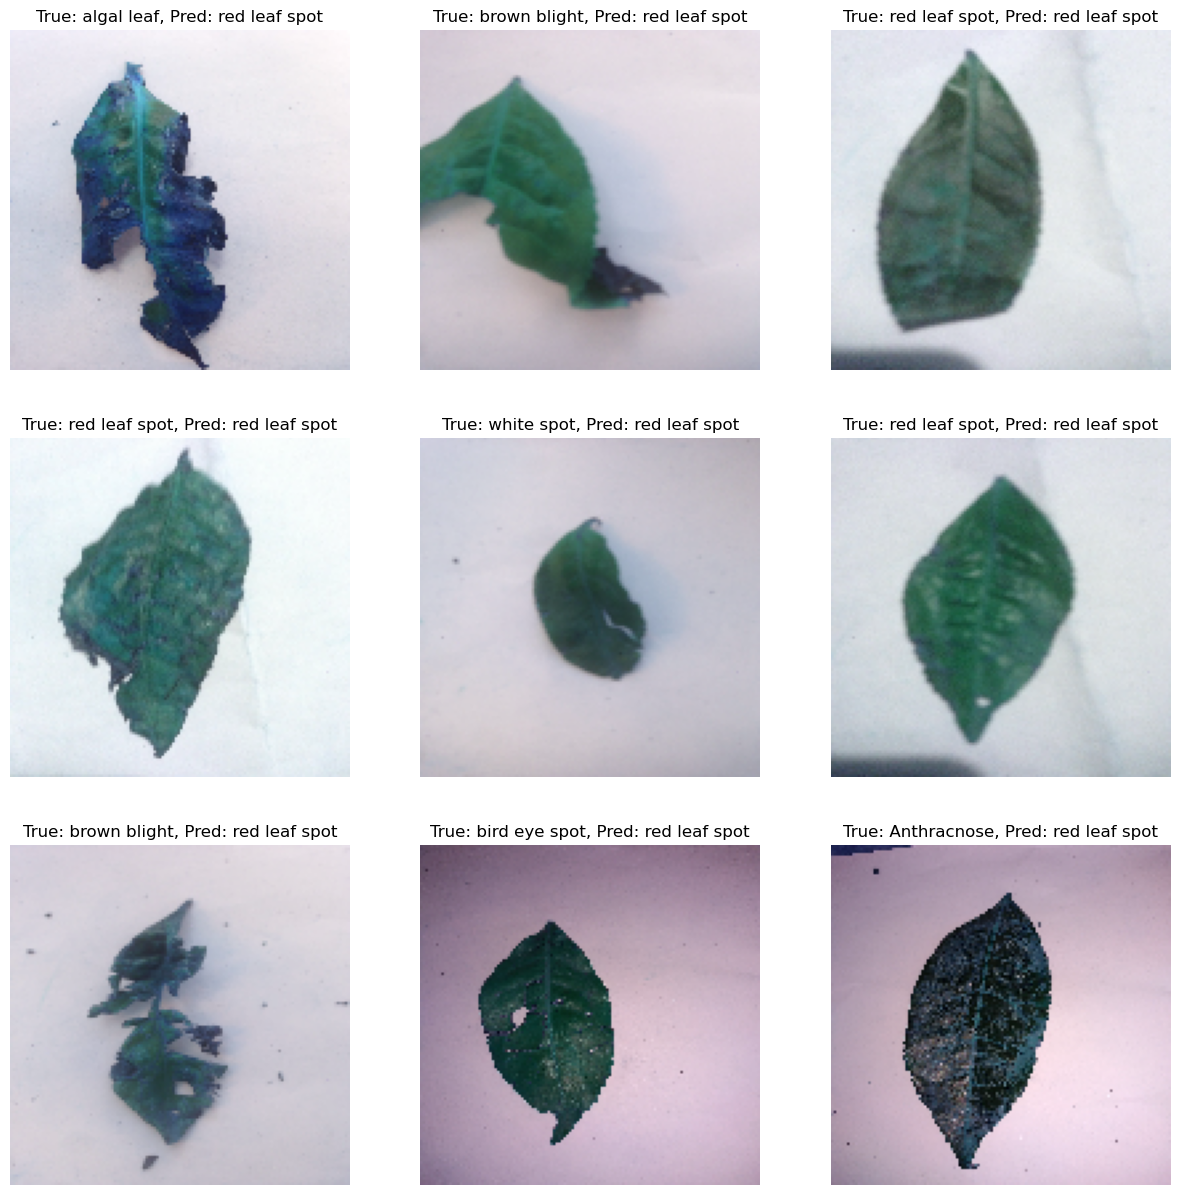

In [30]:
# Visualize some predictions
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns




In [32]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=label_names)
print(report)



               precision    recall  f1-score   support

   algal leaf       0.00      0.00      0.00        15
  Anthracnose       0.00      0.00      0.00        28
bird eye spot       0.00      0.00      0.00        27
 brown blight       0.00      0.00      0.00        19
   gray light       0.00      0.00      0.00        25
      healthy       0.00      0.00      0.00        16
red leaf spot       0.14      1.00      0.24        24
   white spot       0.00      0.00      0.00        23

     accuracy                           0.14       177
    macro avg       0.02      0.12      0.03       177
 weighted avg       0.02      0.14      0.03       177



C:\Users\phani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


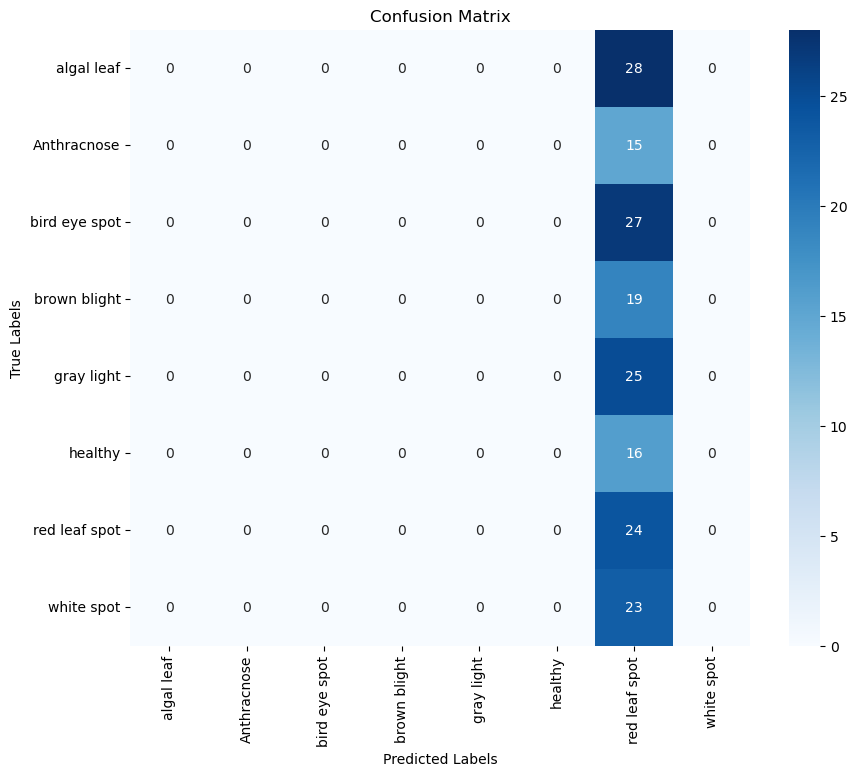

In [33]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=label_names)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()